## Import libs, set paths and load params

In [9]:
import os, glob
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "../src")
import auxilary_functions as f
from generation_algorithm import *
import subprocess
import csv
import matplotlib.pyplot as plt

cfg = f.get_actual_parametrization("../src/config.json")

sizes = ['250', '500', '750', '1000']
os.chdir('../networks/')

In [10]:
# import networkx as nx

# G = nx.path_graph(300)

# comp = nx.algorithms.community.centrality.girvan_newman(G)

# print(tuple(sorted(c) for c in next(comp)))

In [11]:
print(os.getcwd())
stability_dir = os.path.join(os.getcwd(), 'old_stability_analysis')

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks


In [132]:
# np.array(pd.read_csv(os.path.join(stability_dir, 'randg/250/network_randG_N250.csv'), header = None))

In [133]:
# df_ex1 = pd.DataFrame({'num_legs': [2, 4, 8, 0],

#                    'num_wings': [2, 0, 0, 0],

#                    'num_specimen_seen': [10, 2, 1, 8]},

#                   index=['falcon', 'dog', 'spider', 'fish'])

# df_ex2 = pd.DataFrame({'num_legs': [2, 999, 999, 999],

#                    'num_wings': [2, 0, 0, 0],

#                    'num_specimen_seen': [10, 2, 1, 8]},

#                   index=['falcon', 'dog', 'spider', 'fish'])

# lst_dfs = [df_ex1, df_ex2]
# sum(lst_dfs) / len(lst_dfs)

### Random Graph

In [30]:
networks = ['randg']

for network in networks:
    for size in sizes:
        current_dir = os.path.join(stability_dir, network, size)
        print(current_dir)
        pandas_df_lst = []
        for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
            print(rep, file)
            report = f.analyze_exctracted_network(cfg, file, network, rep, size, stability_motifs=True)
            print(type(report))
            pandas_df_lst.append(report)
        #enrichment_report = pd.concat(pandas_df_lst)
        pandas_df_list = sum(pandas_df_lst)/len(pandas_df_lst)
        pandas_df_list['network_label'] = network
        pandas_df_list['size'] = size
        print(pandas_df_list)                                     
        pandas_df_list.to_csv(os.path.join(stability_dir, 'z-scores', network+'_'+str(size)+'_z_score.tsv'))

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test9.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test4.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test5.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test2.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test6.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test3.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test10.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test8.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test7.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/250/network_randG_N250_test1.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

<class 'pandas.core.frame.DataFrame'>
      N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C  1456.7       1463.80   23.749006 -0.249520     0.25         randg  250
021D   715.6        718.50   10.299449 -0.264875     0.26         randg  250
021U   744.1        748.03   10.592517 -0.255297     0.25         randg  250
030C     4.6          4.67    1.695101  0.149632     0.26         randg  250
030T    15.7         14.34    2.852890  0.376703     0.28         randg  250
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test9.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test7.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test10.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test3.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test6.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test4.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test2.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test5.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test8.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/500/network_randG_N500_test1.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C  11796.2      11786.10   64.178304  0.036760     0.25         randg  500
021D   5909.3       5899.53   32.288594  0.252953     0.25         randg  500
021U   5893.4       5883.55   30.763456  0.217119     0.23         randg  500
030C     42.9         40.04    5.648020  0.489881     0.27         randg  500
030T    118.9        119.59   10.085922  0.087082     0.30         randg  500
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test8.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test6.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test9.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test4.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test2.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test7.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test5.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test10.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test3.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/750/network_randG_N750_test1.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C  39865.4      39926.67  157.009234 -0.391794     0.21         randg  750
021D  19944.9      19962.80   77.581298 -0.270993     0.27         randg  750
021U  20014.6      20032.20   74.300724 -0.308835     0.21         randg  750
030C    139.4        132.73   10.068955  0.842685     0.25         randg  750
030T    395.8        398.15   20.715070 -0.169453     0.29         randg  750
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test1.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test8.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test4.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test2.tsv
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test6.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test7.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test5.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test10.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test3.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/randg/1000/network_randG_N1000_test9.tsv
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label  size
021C  94982.1      94866.79  287.621520  0.429586     0.25         randg  1000
021D  47440.9      47394.18  137.695916  0.365258     0.24         randg  1000
021U  47470.6      47410.70  136.882886  0.444415     0.25         randg  1000
030C    316.6        315.77   15.128714  0.013399     0.16         randg  1000
030T    961.3        955.76   25.569307  0.296907     0.25         randg  1000


### NetworkX

In [12]:
networks = ['networkx']
sizes = ['500', '750', '1000', '1500']

for network in networks:
    for size in sizes:
        current_dir = os.path.join(stability_dir, network, size)
        print(current_dir)
        pandas_df_lst = []
        for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
            print(rep, file)
            report = f.analyze_exctracted_network(cfg, file, network, rep, size, stability_motifs=True)
            print(type(report))
            pandas_df_lst.append(report)
        #enrichment_report = pd.concat(pandas_df_lst)
        pandas_df_list = sum(pandas_df_lst)/len(pandas_df_lst)
        pandas_df_list['network_label'] = network
        pandas_df_list['size'] = size
        print(pandas_df_list)                                     
        pandas_df_list.to_csv(os.path.join(stability_dir, 'z-scores', network+'_'+str(size)+'_z_score.tsv'))

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_5_nodes_500.tsv


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_2_nodes_500.tsv



100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_4_nodes_500.tsv



100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_1_nodes_500.tsv



100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_9_nodes_500.tsv



100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_6_nodes_500.tsv



100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_7_nodes_500.tsv



100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_8_nodes_500.tsv



100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_0_nodes_500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/500/scale_free_nx_3_nodes_500.tsv



100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C   2525.2       2471.10  133.852447  0.428854     0.17      networkx  500
021D  16157.6      16103.93  123.265300  0.473045     0.15      networkx  500
021U   1625.1       1585.29   20.092797  2.133870     0.12      networkx  500
030C      3.5          3.37    2.072467 -0.134963     0.30      networkx  500
030T    110.3        148.43   17.467398 -2.198449     0.05      networkx  500
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_7_nodes_750.tsv



100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_4_nodes_750.tsv



100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_1_nodes_750.tsv



100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_5_nodes_750.tsv



100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_6_nodes_750.tsv



100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_2_nodes_750.tsv



100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_8_nodes_750.tsv



100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_9_nodes_750.tsv



100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_3_nodes_750.tsv



100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/750/scale_free_nx_0_nodes_750.tsv



100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C   4246.7       4188.69  187.828835  0.173030     0.18      networkx  750
021D  32483.5      32439.34  177.023646  0.108956     0.20      networkx  750
021U   2427.6       2368.58   26.859469  2.225442     0.04      networkx  750
030C      4.0          4.61    2.184117 -0.259036     0.47      networkx  750
030T    157.3        204.12   23.842592 -2.041963     0.07      networkx  750
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_3_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_6_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_9_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_4_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_7_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_0_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_5_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_2_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_8_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1000/scale_free_nx_1_nodes_1000.tsv



100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label  size
021C   5106.0       5071.16  265.391135  0.395013     0.20      networkx  1000
021D  55608.0      55578.46  256.607406  0.373761     0.19      networkx  1000
021U   3283.5       3223.98   23.240697  2.792992     0.02      networkx  1000
030C      3.3          3.73    1.837304 -0.328818     0.31      networkx  1000
030T    194.8        249.13   20.469518 -2.759056     0.02      networkx  1000
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_4_nodes_1500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_0_nodes_1500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_3_nodes_1500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_2_nodes_1500.tsv



100%|██████████| 1/1 [00:02<00:00,  2.10s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_5_nodes_1500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_1_nodes_1500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_6_nodes_1500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.79s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_8_nodes_1500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_9_nodes_1500.tsv



100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/networkx/1500/scale_free_nx_7_nodes_1500.tsv



100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

<class 'pandas.core.frame.DataFrame'>
        N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label  \
021C    7552.6       7587.58  278.786838  0.162651     0.16      networkx   
021D  104989.7     105015.83  272.281891  0.163762     0.15      networkx   
021U    4999.8       4941.65   24.381042  2.756504     0.10      networkx   
030C       4.1          3.55    1.712090  0.183881     0.26      networkx   
030T     246.6        309.08   23.576769 -2.746484     0.03      networkx   

      size  
021C  1500  
021D  1500  
021U  1500  
030C  1500  
030T  1500  


### DAG

In [53]:
networks = ['dag']

for network in networks:
    for size in sizes:
        current_dir = os.path.join(stability_dir, network, size)
        print(current_dir)
        pandas_df_lst = []
        for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
            print(rep, file)
            report = f.analyze_exctracted_network(cfg, file, network, rep, size, stability_motifs=True)
            print(type(report))
            pandas_df_lst.append(report)
        #enrichment_report = pd.concat(pandas_df_lst)
        pandas_df_list = sum(pandas_df_lst)/len(pandas_df_lst)
        pandas_df_list['network_label'] = network
        pandas_df_list['size'] = size
        print(pandas_df_list)                                     
        pandas_df_list.to_csv(os.path.join(stability_dir, 'z-scores', network+'_'+str(size)+'_z_score.tsv'))

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test1.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test7.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test4.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test8.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test6.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test5.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test10.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test9.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test3.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

<class 'pandas.core.frame.DataFrame'>
10 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/250/network_DAG_N250_test2.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

<class 'pandas.core.frame.DataFrame'>
           N_real  mean(N_rand)  sd(N_rand)   Z-score   P-value network_label  \
021C  1355.545455   1302.218182   19.314344  2.976465  0.000000           dag   
021D   792.000000    774.500000    9.548173  1.957152  0.036364           dag   
021U   782.727273    765.763636    9.010374  1.898578  0.063636           dag   
030C     0.000000      3.645455    1.735978 -2.139348  0.027273           dag   
030T    14.818182     14.227273    3.357753  0.277539  0.309091           dag   

     size  
021C  250  
021D  250  
021U  250  
030C  250  
030T  250  
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test10.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test5.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test3.tsv
[[0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test4.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test1.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test2.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test9.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test6.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test7.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

<class 'pandas.core.frame.DataFrame'>
10 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/500/network_DAG_N500_test8.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

<class 'pandas.core.frame.DataFrame'>
           N_real  mean(N_rand)  sd(N_rand)   Z-score   P-value network_label  \
021C  9853.909091   9597.827273   59.907493  4.340959  0.000000           dag   
021D  6980.090909   6908.381818   30.090475  2.414902  0.009091           dag   
021U  7085.363636   7010.436364   29.420703  2.609260  0.000000           dag   
030C     0.000000     20.763636    4.141221 -5.177596  0.000000           dag   
030T   161.454545    134.481818   10.113991  3.096752  0.027273           dag   

     size  
021C  500  
021D  500  
021U  500  
030C  500  
030T  500  
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test9.tsv
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test1.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test7.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test2.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test3.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test4.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test8.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test6.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test10.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

<class 'pandas.core.frame.DataFrame'>
10 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/750/network_DAG_N750_test5.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


<class 'pandas.core.frame.DataFrame'>
            N_real  mean(N_rand)  sd(N_rand)   Z-score   P-value  \
021C  32023.090909  31313.563636  129.355494  5.700566  0.000000   
021D  24796.454545  24588.900000   67.587665  3.141882  0.000000   
021U  24714.727273  24506.845455   60.719494  3.512123  0.000000   
030C      0.000000     62.700000    7.312149 -8.835087  0.000000   
030T    535.818182    466.263636   18.908174  3.913189  0.018182   

     network_label size  
021C           dag  750  
021D           dag  750  
021U           dag  750  
030C           dag  750  
030T           dag  750  
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test3.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.60s/it]


<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test5.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test1.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test2.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test10.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test7.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test6.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test4.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test9.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


<class 'pandas.core.frame.DataFrame'>
10 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/dag/1000/network_DAG_N1000_test8.tsv
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


100%|██████████| 1/1 [00:02<00:00,  2.32s/it]

<class 'pandas.core.frame.DataFrame'>
            N_real  mean(N_rand)  sd(N_rand)    Z-score  P-value  \
021C  73805.181818  72264.981818  199.757124   8.069852      0.0   
021D  59942.909091  59486.800000   96.485141   5.030755      0.0   
021U  59942.909091  59496.363636  102.955170   4.445413      0.0   
030C      0.000000    136.545455    9.989133 -14.611530      0.0   
030T   1287.909091   1119.345455   29.309902   6.201621      0.0   

     network_label  size  
021C           dag  1000  
021D           dag  1000  
021U           dag  1000  
030C           dag  1000  
030T           dag  1000  


## GNW

In [54]:
networks = ['gnw']

for network in networks:
    for size in sizes:
        current_dir = os.path.join(stability_dir, network, size)
        print(current_dir)
        pandas_df_lst = []
        for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
            print(rep, file)
            report = f.analyze_exctracted_network(cfg, file, network, rep, size, stability_motifs=True)
            print(type(report))
            pandas_df_lst.append(report)
        #enrichment_report = pd.concat(pandas_df_lst)
        pandas_df_list = sum(pandas_df_lst)/len(pandas_df_lst)
        pandas_df_list['network_label'] = network
        pandas_df_list['size'] = size
        print(pandas_df_list)                                     
        pandas_df_list.to_csv(os.path.join(stability_dir, 'z-scores', network+'_'+str(size)+'_z_score.tsv'))
                                                

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-7.tsv


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-5.tsv



100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-8.tsv



100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-1.tsv



100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-3.tsv



100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-10.tsv



100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-4.tsv



100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-9.tsv



100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-2.tsv



100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/250/ecoli_transcriptional_network_regulonDB_6_7-6.tsv



100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C    281.2        506.08   74.239454 -4.031699     0.05           gnw  250
021D  13091.4      13278.90   71.115843 -3.368283     0.05           gnw  250
021U    282.3        285.93   18.699871 -0.975294     0.13           gnw  250
030C      0.0          0.81    0.865244       NaN     0.71           gnw  250
030T     93.8        129.13   23.953743 -1.030131     0.12           gnw  250
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-7.tsv



100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-5.tsv



100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-8.tsv



100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-1.tsv



100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-3.tsv



100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-10.tsv



100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-4.tsv



100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-9.tsv



100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-2.tsv



100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/500/ecoli_transcriptional_network_regulonDB_6_7-6.tsv



100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C    497.9       1256.62  154.916728 -5.324914     0.00           gnw  500
021D  35107.8      35776.38  150.945251 -4.821187     0.00           gnw  500
021U    492.2        585.50   26.269108 -4.997212     0.03           gnw  500
030C      0.0          1.06    0.983978 -1.018617     0.51           gnw  500
030T    166.6        193.73   26.910168 -0.238964     0.14           gnw  500
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-7.tsv



100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-5.tsv



100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-8.tsv



100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-1.tsv



100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-3.tsv



100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-10.tsv



100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-4.tsv



100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-9.tsv



100%|██████████| 1/1 [00:02<00:00,  2.32s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-2.tsv



100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/750/ecoli_transcriptional_network_regulonDB_6_7-6.tsv



100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C    904.3       2224.10  252.628305 -6.056332     0.00           gnw  750
021D  92618.4      93825.91  247.908896 -5.604575     0.00           gnw  750
021U   1232.5       1453.92   60.206575 -4.333207     0.02           gnw  750
030C      0.0          1.16    1.131968 -1.009930     0.44           gnw  750
030T    327.8        376.77   67.990484 -0.529168     0.20           gnw  750
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-7.tsv



100%|██████████| 1/1 [00:02<00:00,  2.21s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-5.tsv



100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-8.tsv



100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-1.tsv



100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-3.tsv



100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-10.tsv



100%|██████████| 1/1 [00:01<00:00,  1.79s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-4.tsv



100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-9.tsv



100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-2.tsv



100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/gnw/1000/ecoli_transcriptional_network_regulonDB_6_7-6.tsv



100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

<class 'pandas.core.frame.DataFrame'>
        N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label  \
021C    1180.6       3398.87  314.638747 -7.182302     0.00           gnw   
021D  141732.1     143780.72  310.749831 -6.712647     0.00           gnw   
021U    1825.4       2248.70   63.774426 -7.232372     0.00           gnw   
030C       0.0          1.74    1.257744 -1.373806     0.23           gnw   
030T     489.1        485.56   68.414092  0.082258     0.29           gnw   

      size  
021C  1000  
021D  1000  
021U  1000  
030C  1000  
030T  1000  


## FFLatt

In [55]:
networks = ['fflatt']

for network in networks:
    for size in sizes:
        current_dir = os.path.join(stability_dir, network, size)
        print(current_dir)
        pandas_df_lst = []
        for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
            print(rep, file)
            report = f.analyze_exctracted_network(cfg, file, network, rep, size, stability_motifs=True)
            print(type(report))
            pandas_df_lst.append(report)
        #enrichment_report = pd.concat(pandas_df_lst)
        pandas_df_list = sum(pandas_df_lst)/len(pandas_df_lst)
        pandas_df_list['network_label'] = network
        pandas_df_list['size'] = size
        print(pandas_df_list)                                     
        pandas_df_list.to_csv(os.path.join(stability_dir, 'z-scores', network+'_'+str(size)+'_z_score.tsv'))

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_7_nodes_250_ffl_perc_0.13.tsv


100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_6_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_8_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_4_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_1_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_3_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_5_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_9_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_2_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/250/fflatt_transcriptional_network_0_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

<class 'pandas.core.frame.DataFrame'>
      N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C  1484.2       1185.36  104.878885  2.910897     0.00        fflatt  250
021D  6397.9       6157.13   95.417612  2.555931     0.02        fflatt  250
021U   553.7        540.31   16.537450  0.960980     0.22        fflatt  250
030C     0.0          4.62    2.176966 -2.219236     0.01        fflatt  250
030T   135.5        110.65   13.847663  1.980403     0.10        fflatt  250
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_0_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_8_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_2_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_9_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_3_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_7_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_6_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_4_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_5_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/500/fflatt_transcriptional_network_1_nodes_500_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C   4344.0       3398.68  253.928019  4.070131     0.00        fflatt  500
021D  28650.6      27814.89  239.862728  3.829343     0.01        fflatt  500
021U   1228.0       1151.56   30.080504  2.595393     0.02        fflatt  500
030C      0.0          8.87    3.569138 -2.533723     0.01        fflatt  500
030T    267.1        252.40   29.699484  0.619605     0.24        fflatt  500
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_4_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_0_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_7_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_5_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_6_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_3_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_1_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_8_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_2_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/750/fflatt_transcriptional_network_9_nodes_750_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C   5635.6       4558.18  342.050724  3.129322     0.03        fflatt  750
021D  65739.3      64749.03  334.438599  2.867622     0.03        fflatt  750
021U   1864.8       1771.06   29.301550  3.199680     0.00        fflatt  750
030C      0.0          7.78    3.540768 -2.221344     0.00        fflatt  750
030T    301.4        322.25   30.064882 -0.615726     0.23        fflatt  750
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_7_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:02<00:00,  2.37s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_2_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:02<00:00,  2.38s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_1_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_9_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_5_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.79s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_6_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_4_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_8_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_0_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt/1000/fflatt_transcriptional_network_3_nodes_1000_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

<class 'pandas.core.frame.DataFrame'>
        N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label  \
021C   10734.8       8190.82  791.426591  3.294647     0.00        fflatt   
021D  139878.2     137492.75  774.100519  3.153551     0.00        fflatt   
021U    2747.5       2573.26   44.367732  4.302365     0.00        fflatt   
030C       0.0         10.94    4.205364 -2.741040     0.00        fflatt   
030T     525.5        533.93   54.777589 -0.174570     0.38        fflatt   

      size  
021C  1000  
021D  1000  
021U  1000  
030C  1000  
030T  1000  


## FFLatt 037

In [135]:
networks = ['fflatt-037']

for network in networks:
    for size in sizes:
        current_dir = os.path.join(stability_dir, network, size)
        print(current_dir)
        pandas_df_lst = []
        for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*.tsv'))):
            print(rep, file)
            report = f.analyze_exctracted_network(cfg, file, network, rep, size, stability_motifs=True)
            print(type(report))
            pandas_df_lst.append(report)
        #enrichment_report = pd.concat(pandas_df_lst)
        pandas_df_list = sum(pandas_df_lst)/len(pandas_df_lst)
        pandas_df_list['network_label'] = network
        pandas_df_list['size'] = size
        print(pandas_df_list)                                     
        pandas_df_list.to_csv(os.path.join(stability_dir, 'z-scores', network+'_'+str(size)+'_z_score.tsv'))

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_7_nodes_250_ffl_perc_0.13.tsv


100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_6_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_8_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_4_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_1_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_3_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_5_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_9_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_2_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/250/fflatt_transcriptional_network_0_nodes_250_ffl_perc_0.13.tsv



100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

<class 'pandas.core.frame.DataFrame'>
      N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C  1484.2       1178.53   96.166325  3.268009     0.00    fflatt-037  250
021D  6397.9       6147.74   87.049217  2.924774     0.01    fflatt-037  250
021U   553.7        541.24   15.615087  0.740865     0.18    fflatt-037  250
030C     0.0          4.10    2.144695 -2.124003     0.03    fflatt-037  250
030T   135.5        109.63   14.213893  1.791890     0.12    fflatt-037  250
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_4_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.90s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_0_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.65s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_9_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_1_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_6_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_7_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_2_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_3_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_8_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/500/fflatt_transcriptional_network_5_nodes_500_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

<class 'pandas.core.frame.DataFrame'>
       N_real  mean(N_rand)  sd(N_rand)   Z-score  P-value network_label size
021C   9454.0       5927.68  558.480378  6.278235     0.00    fflatt-037  500
021D  46303.2      43159.08  527.155603  5.921679     0.00    fflatt-037  500
021U   1466.5       1170.03   34.678435  8.741382     0.00    fflatt-037  500
030C      0.0         13.56    4.028125 -3.555947     0.01    fflatt-037  500
030T    383.5        286.61   35.009386  3.042815     0.07    fflatt-037  500
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_0_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_8_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_6_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.23s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_2_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_5_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_7_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:03<00:00,  3.06s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_1_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_3_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_4_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/750/fflatt_transcriptional_network_9_nodes_750_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.38s/it]

<class 'pandas.core.frame.DataFrame'>
        N_real  mean(N_rand)   sd(N_rand)   Z-score  P-value network_label  \
021C   17380.2      11624.38  1004.527559  5.560943     0.00    fflatt-037   
021D  111486.9     106236.71   959.587167  5.290116     0.01    fflatt-037   
021U    2352.9       1979.25    60.330629  6.626938     0.00    fflatt-037   
030C       0.0         18.87     5.505248 -3.688963     0.00    fflatt-037   
030T     634.4        466.92    46.660061  3.989369     0.05    fflatt-037   

     size  
021C  750  
021D  750  
021U  750  
030C  750  
030T  750  
/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000
0 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_0_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:04<00:00,  4.18s/it]

<class 'pandas.core.frame.DataFrame'>
1 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_5_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:04<00:00,  4.36s/it]

<class 'pandas.core.frame.DataFrame'>
2 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_6_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:03<00:00,  3.82s/it]

<class 'pandas.core.frame.DataFrame'>
3 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_2_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

<class 'pandas.core.frame.DataFrame'>
4 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_1_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.84s/it]

<class 'pandas.core.frame.DataFrame'>
5 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_4_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.30s/it]

<class 'pandas.core.frame.DataFrame'>
6 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_7_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:04<00:00,  4.82s/it]

<class 'pandas.core.frame.DataFrame'>
7 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_9_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

<class 'pandas.core.frame.DataFrame'>
8 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_3_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

<class 'pandas.core.frame.DataFrame'>
9 /home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks/old_stability_analysis/fflatt-037/1000/fflatt_transcriptional_network_8_nodes_1000_ffl_perc_0.374.tsv



100%|██████████| 1/1 [00:04<00:00,  4.53s/it]

<class 'pandas.core.frame.DataFrame'>
        N_real  mean(N_rand)   sd(N_rand)   Z-score  P-value network_label  \
021C   24053.7      18130.91  1350.493470  4.434865     0.00    fflatt-037   
021D  167337.2     161937.59  1285.055258  4.256892     0.00    fflatt-037   
021U    3146.4       2716.36    73.378430  5.818181     0.00    fflatt-037   
030C       0.0         23.27     5.912121 -4.031085     0.00    fflatt-037   
030T     720.6        562.88    59.886113  2.704070     0.08    fflatt-037   

      size  
021C  1000  
021D  1000  
021U  1000  
030C  1000  
030T  1000  


## Collect stats

In [5]:
zscore_stats_lst = []
for rep, file in enumerate(glob.glob(os.path.join(stability_dir, 'z-scores', '*.tsv'))):
    #print(file)
    zscore_stats_df = pd.io.parsers.read_csv(file, sep=",", index_col=0, header=None, skiprows=1)
    zscore_stats_df['motif'] = zscore_stats_df.index
    zscore_stats_df.reset_index()
    zscore_stats_df.columns = ['counts_ori', 'counts_rand', 'sd_rand',\
                                'z-score', 'p-val', 'label', 'size', 'motif']
    #print(zscore_stats_df)
    zscore_stats_lst.append(zscore_stats_df)

## Plot z-scores

In [6]:
zscore_stats_df = pd.concat(zscore_stats_lst)
zscore_stats_df

,counts_ori,counts_rand,sd_rand,z-score,p-val,label,size,motif
0,,,,,,,,
021C,1484.2,1185.36,104.878885,2.910897,0.00,fflatt,250,021C
021D,6397.9,6157.13,95.417612,2.555931,0.02,fflatt,250,021D
021U,553.7,540.31,16.537450,0.960980,0.22,fflatt,250,021U
030C,0.0,4.62,2.176966,-2.219236,0.01,fflatt,250,030C
030T,135.5,110.65,13.847663,1.980403,0.10,fflatt,250,030T
...,...,...,...,...,...,...,...,...
021C,24053.7,18130.91,1350.493470,4.434865,0.00,fflatt-037,1000,021C
021D,167337.2,161937.59,1285.055258,4.256892,0.00,fflatt-037,1000,021D
021U,3146.4,2716.36,73.378430,5.818181,0.00,fflatt-037,1000,021U


In [7]:
zscore_stats_df[zscore_stats_df['label']=='dag']

,counts_ori,counts_rand,sd_rand,z-score,p-val,label,size,motif
0,,,,,,,,
021C,9853.909091,9597.827273,59.907493,4.340959,0.000000,dag,500,021C
021D,6980.090909,6908.381818,30.090475,2.414902,0.009091,dag,500,021D
021U,7085.363636,7010.436364,29.420703,2.609260,0.000000,dag,500,021U
030C,0.000000,20.763636,4.141221,-5.177596,0.000000,dag,500,030C
030T,161.454545,134.481818,10.113991,3.096752,0.027273,dag,500,030T
021C,1355.545455,1302.218182,19.314344,2.976465,0.000000,dag,250,021C
021D,792.000000,774.500000,9.548173,1.957152,0.036364,dag,250,021D
021U,782.727273,765.763636,9.010374,1.898578,0.063636,dag,250,021U
030C,0.000000,3.645455,1.735978,-2.139348,0.027273,dag,250,030C


In [8]:
zscore_stats_df[zscore_stats_df['label']=='fflatt-037']

,counts_ori,counts_rand,sd_rand,z-score,p-val,label,size,motif
0,,,,,,,,
021C,1484.2,1178.53,96.166325,3.268009,0.00,fflatt-037,250,021C
021D,6397.9,6147.74,87.049217,2.924774,0.01,fflatt-037,250,021D
021U,553.7,541.24,15.615087,0.740865,0.18,fflatt-037,250,021U
030C,0.0,4.10,2.144695,-2.124003,0.03,fflatt-037,250,030C
030T,135.5,109.63,14.213893,1.791890,0.12,fflatt-037,250,030T
021C,17380.2,11624.38,1004.527559,5.560943,0.00,fflatt-037,750,021C
021D,111486.9,106236.71,959.587167,5.290116,0.01,fflatt-037,750,021D
021U,2352.9,1979.25,60.330629,6.626938,0.00,fflatt-037,750,021U
030C,0.0,18.87,5.505248,-3.688963,0.00,fflatt-037,750,030C


In [9]:
zscore_stats_df[zscore_stats_df['label']=='gnw']

,counts_ori,counts_rand,sd_rand,z-score,p-val,label,size,motif
0,,,,,,,,
021C,904.3,2224.10,252.628305,-6.056332,0.00,gnw,750,021C
021D,92618.4,93825.91,247.908896,-5.604575,0.00,gnw,750,021D
021U,1232.5,1453.92,60.206575,-4.333207,0.02,gnw,750,021U
030C,0.0,1.16,1.131968,-1.009930,0.44,gnw,750,030C
030T,327.8,376.77,67.990484,-0.529168,0.20,gnw,750,030T
021C,281.2,506.08,74.239454,-4.031699,0.05,gnw,250,021C
021D,13091.4,13278.90,71.115843,-3.368283,0.05,gnw,250,021D
021U,282.3,285.93,18.699871,-0.975294,0.13,gnw,250,021U
030C,0.0,0.81,0.865244,NaN,0.71,gnw,250,030C


In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',\
'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',\
'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',\
'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd',\
'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',\
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',\
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',\
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',\
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest',\
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r',\
'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow',\
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2',\
'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',\
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral',\
'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r',\
'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',\
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain',\
'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',\
'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

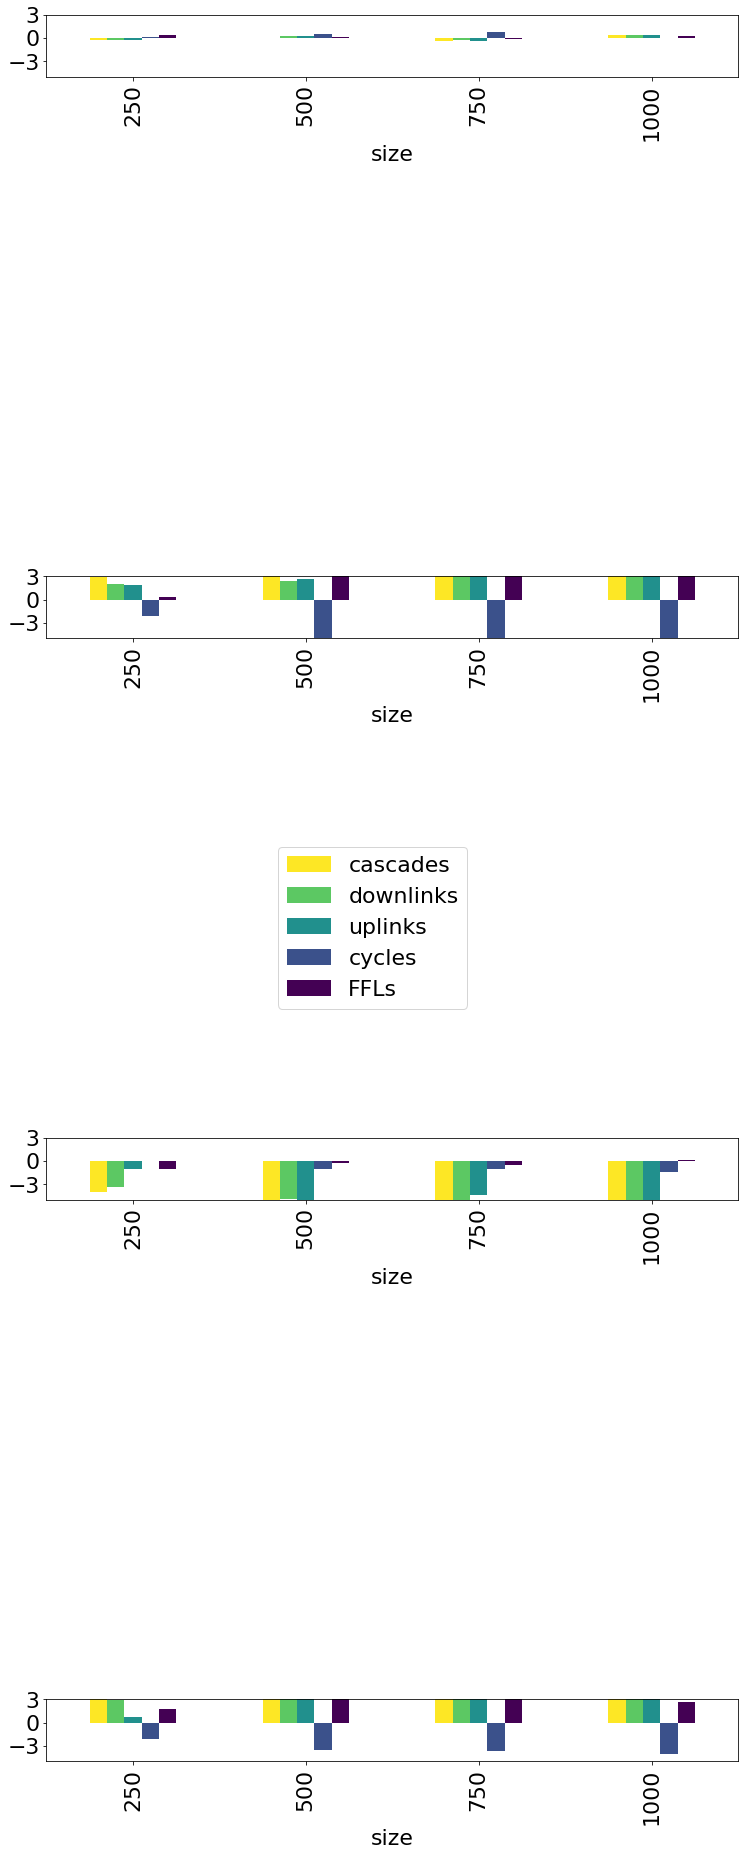

In [12]:
plt.rcParams.update({'font.size': 22})
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4,1)
fig.tight_layout()

plot_style = 'viridis_r'
zscore_stats_df[zscore_stats_df['label']=='randg'].groupby(["motif", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "z-score", legend = False,\
         ax=ax1, cmap=plot_style, figsize = (12,34), ylim=(-5,3), yticks=[-3,0,3])

zscore_stats_df[zscore_stats_df['label']=='dag'].groupby(["motif", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "z-score", legend = False,\
         ax=ax2, cmap=plot_style, figsize = (12,34), ylim=(-5,3), yticks=[-3,0,3])

zscore_stats_df[zscore_stats_df['label']=='gnw'].groupby(["motif", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "z-score", legend = False,\
         ax=ax3, cmap=plot_style, figsize = (12,34), ylim=(-5,3), yticks=[-3,0,3])

zscore_stats_df[zscore_stats_df['label']=='fflatt-037'].groupby(["motif", "size"]).agg(np.mean).unstack(0).\
    plot(kind = "bar", y = "z-score", legend = False,\
         ax=ax4, cmap=plot_style, figsize = (12,34), ylim=(-5,3), yticks=[-3,0,3])


fig.legend(["cascades", "downlinks", "uplinks", "cycles", "FFLs"], loc="center")
plt.savefig("test.svg")